In [1]:
import numpy as np
## important functions
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

# C2_W1_Lab03_CoffeeRoasting_Numpy

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2025-06-11 23:03:36.577798: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 23:03:36.592918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 23:03:36.717203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 23:03:36.809915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749663216.905069   74872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749663216.93

In [5]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


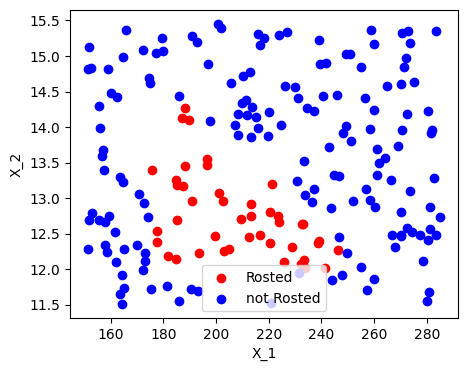

In [35]:
## plot the data
plt.figure(figsize=(5,4))
rosted = Y==1
not_rosted = Y==0
plt.scatter(X[rosted[:,0],0],X[rosted[:,0],1],c='r',marker='o',label='Rosted')
plt.scatter(X[not_rosted[:,0],0],X[not_rosted[:,0],1],c='b',marker='o',label='not Rosted')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()

In [40]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


2025-06-11 23:03:41.361674: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [41]:
def g(z):
    return 1/(1+ np.exp(-z))

In [ ]:
# Next, you will define the `my_dense()` function which computes the activations of a dense layer.
# here import in W matrix , columns are one single w vector ,for single neuron

In [53]:
def my_dense(a_in, W,b):
    nodes= W.shape[1]
    a_out= np.zeros(nodes)
    for i in range(nodes):
        z= np.dot(W[:,i],a_in)+b[i]
        a_out[i]= g(z)

    return a_out

In [45]:
# lets build 2 layer NN

In [49]:
def my_sequence(x,W1,b1,W2,b2):
     a1= my_dense(x,W1,b1)
     a2= my_dense(a1,W2,b2)
     return a2

In [47]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [48]:
## small information ,from weights size we can predict the NN architectrue
## 2 layers(W1_tem,W2_temp), 3 nodes from first layer, 1 node in second layer
## from rows of W can tell the nodes in previous layer , like W1_temp has two rows ,means 2 inputs are the np.dot competible hona chahiye

In [55]:
# prediction
def my_prediction(X,W1,b1,W2,b2):
    m= X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0]= my_sequence(X[i],W1,b1,W2,b2)
    return p

In [56]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_prediction(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

/tmp/ipykernel_74872/3837749361.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0]= my_sequence(X[i],W1,b1,W2,b2)


In [57]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [61]:
# Done